# Spark 시작하기

* Last Updated on 20200901TUE1000 20190909MON1100 20181112_20180430_20171203_20160412
* 설치
    * Pyspark 3.0 2020
    * Spark2.2 for Hadoop2.7 (Python 3.6x)
    * Spark2.0 for Hadoop2.7 (Python 2.7x)
    * Spark1.6 for Hadoop2.6

## S.1 학습내용

### S.1.1 목표

* Spark를 설치할 수 있다.
* SparkSession을 생성하여 Spark를 사용할 수 있다.
* Spark의 설정을 변경할 수 있다.

### S.1.2 목차

* S.2 Why Spark?
* S.2.1 빅데이터 처리
* S.2.2 Hadoop과 Spark
* S.2.3 Spark 프레임워크
* S.3 Notebook 설치
* S.4 pyspark 설치
* S.5 Spark 설치
* S.5.1 사전 설치
* S.5.2 설치
* S.5.3 경로설정
* S.6 실행
* S.6.1 일괄실행
* S.6.2 interactive shell
* S.6.3 오류
* S.7 ipython shell로 Spark사용하기
* S.8 Jupyter Notebook으로 Spark사용하기
* 문제 S-1: Spark 시작하기
* 문제 S-2: Spark standalone cluster 구성하기
* 문제 S-3: MongoDB를 사용하기 위한 jar를 추가하는 설정 변경하기
* 문제 S-4: sqlite를 사용하기 위한 jar를 추가하는 설정 변경하기
* S.9 설정
* S.9.1 필요한 jar를 추가
* S.9.2 log
* S.10 spark-sklearn

## S.2 Why Spark?

### S.2.1 빅데이터 처리

* 빅데이터는 그 명칭에서 알 수 있듯이, **규모가 크다**는 특징이 있다. 과거에는 메가바이트 정도의 크기라고 했다면, 저장용량도 커지면서 그 규모도 그 몇 천배 이상으로 증가했다.
* 또한 데이터가 발생하는 **출처가 다양**하다. 종전에는 '숫자'로 된 재무제표, 시계열 데이터 등 정량적 데이터, 이른바 'Hard Data'가 많았다면, 빅데이터의 경우는 그렇지 않다. SNS에 남겨지는 소문, 평판과 같은 'Soft Data'가 유용한 의미를 제공하기도 한다. 또한 동영상, 센서 데이터, 또는 핸드폰에서 발생하는 다양한 디지털 지문 등 매우 다양한 형태로 발생한다. 발생하는 출처가 다양하므로, 그 데이터 형식이 **비구조적**일 수 밖에 없다. 
* **그 규모가 방대해지고, 여러 저장소에 데이터가 분산**되어 있을 수 있다.
* 그러면 당연히 데이터의 처리도 나누어서 수행되어야 한다. 따라서 이러한 분산작업을 제어하는 기능이 필요하게 된다. 대량의 데이터를 여러 컴퓨터에 나누어 처리하고, 집계하는 **맵리듀스 MapReduce**와 같은 알고리즘이 많이 사용되고 있다.

* 이와 같은 데이터처리는 새로 등장한 유행어인가? 그렇지 않다. 거래를 처리하는 OLTP OnLine Transaction Processing과 구분하여, 분석을 위한 **OLAP OnLine Analytical Processing**이 있다.
이런 OLAP 작업으로 데이터 웨어하우스 Data Warehouse, 데이터 마이닝 Data Mining이 있다.
또한 데이터웨어하우스를 구성하기 위해 **ETL (Extract, Transfrom and Load)** 작업이 필요하다.
**Extract**이란 다양한 입력에서 데이터 추출 (HDFS, files, JSON, DB, ...), **Transform**는 데이터 변환, **Load**는 다양한 형식의 저장 및 예측, 분류, 추천모델 등 지원하는 작업을 말한다.

빅데이터는 이런 과거의 작업에 비해, 특히 새로운 유형, 예를 들면 텍스트를 분석하려고 하며, 이런 데이터를 수집하고, 통계 및 머신러닝 기법을 통해 분석하는 것도 매우 중요한 작업의 하나이다. 이런 다양한 출처에서 실시간 발생하는 대량의 데이터에서 의미있는 통찰력이 있는 '집단지성'을 분석해내는 것이 '빅데이터'인 것이다.

### S.2.2 Hadoop과 Spark

Hadoop은 데이터가 대량으로 증가하면서, 이를 처리하기 위한 자바 기반의 분산 컴퓨팅 프레임워크로 개발되어 쓰이고 있다.
Hadoop은 데이터를 **수집**하는 목적으로 주로 사용된다.
* Hadoop 자체의 파일시스템 HDFS (Hadoop Distributed File System)를 제공하고 있고,
* HDFS에서 데이터를 읽어 **맵리듀스 MapReduce** 작업으로 데이터를 추출, 가공할 수 있다. MapReduce는 Hadoop 이전에도 이미 여러 언어로 개발되어 사용되고 있었지만, 분산환경에서 많이 쓰이는 오픈소스로 Hadoop의 MapReduce가 많이 사용되고 있다.
* 기계학습을 하려면, 데이터를 HDFS로 올려 놓고, 자바 라이브러리인 Mahout 또는 Spark의 Machine Learning 라이브러리를 사용해야 한다.

최근에는 Spark의 사용이 늘어나고 있어서 Hadoop과 비교되고 있다.
반면 Spark는 수집한 데이터를 **분석**하는 용도로 사용된다.
* 자체 파일 시스템이 없고, RDD를 통해 Hadoop의 파일시스템 HDFS를 사용할 수 있다.
* Spark는 Machine Learning 라이브러리를 가지고 있다.
* Hadoop과 달리 메모리에서 처리하기 때문에 빠르다 (pipeline). 빅데이터를 빠르게 Map Reduce 할 수 있다.

구분 | Spark | Hadoop
-------|-------|-------
사용 목적 | 데이터 분석 | 데이터 수집
파일 시스템 | 자체 파일 시스템이 없슴. hdfs, db, csv등을 사용 | hdfs
속도 | 파이프라인을 사용하므로 빠름 | 보다 느림

### S.2.3 Spark 프레임워크

Spark는 2009년 처음 등장하고, 10여년 넘게 버전업을 하면서 널리 이용되고 있다.
현재 처음에 관여했던 개발자가 **Databricks**를 설립해서 관리하고 있다.
* 2009년 UC Berkeley에서 Matei Zaharia가 박사학위 과정에서 개뱔
* 2010년 BSD 라이센스 오픈소스로 전환.
* 2013년 Apache 2.0 license로 전환
* 2020년 6월 18일 3.0 발표

#### 기능

Spark는 실시간 대용량 데이터 처리를 위한 클러스터 컴퓨팅 프레임워크로서, API를 사용해서 데이터를 읽고, 변환, 통계처리, 기계학습, 그래프분석을 할 수 있다.
**Scala**로 개발되어 jvm에서 실행. 그러나 Scala, Java, Python, R 여러 언어를 섞어서 할 수 있는 환경을 제공 (polyglot)
**REPL (Read Eval Print Looop)**이 가능해서 배우기 쉽다. 쉘 환경이 있어 편리하다. Standalone으로 시작할 수 있다.
아래 표에서 보듯이 **Spark Core**가 분산작업에 필요한 바탕이 되고, 그 위 **Sql, streaming, mllib, graphx**를 제공한다.
    
구분 | 구성 | 설명
-------|-------|-------
Spark engine | Spark Core | 작업배분, 입출력 등 분산작업에 필요한 기능
Spark Applicaiton Frameworks | Spark SQL | DataFrames
| Spark Streaming | 실시간 처리
| MLlib | 머신러닝 (참조 scikit-learn)
|GraphX | 그래프 분석

#### 아키텍쳐

Spark는 Master-Slave 아키텍처에 따라, 중앙에 하나의 Driver가 있고, 여러 Worker가 분산되어 있고 이를 통해서 작업이 실행된다.
* Spark Driver: Driver는 자바 프로세스로서 Scala, Java, Python 언어이든 main() 함수가 실행된다. SparkSession을 만들고, 데이터 처리하는 과정의 상태관리도 하고, 데이터 결과 값을 돌려받는다.
* Cluster Manager: 작업일정을 관리하고, CPU나 메모리등 필요한 자원을 배분한다.
* Worker는 Slave에서 시행, Executor를 가지고 있고, Task를 실행한다.
* Executor는 Taks를 실행하고, 그 결과를 Driver에 반환

에를 들어, ```spark-submit --master <Spark master URL> --driver-memory 5g --executor-memory 7g --executor-cores 2 testSpark.py```라고 작업이 시작되었다고 하자.

In [2]:
import iplantuml

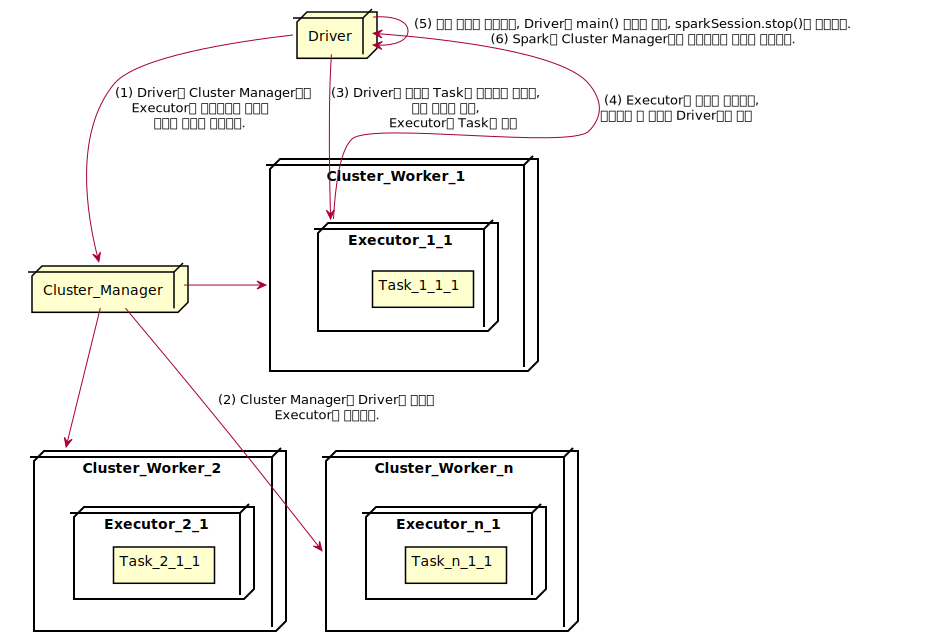

In [35]:
%%plantuml --jar
@startuml
node Driver
node Cluster_Manager
node Cluster_Worker_1 {
    node Executor_1_1 {
        rectangle Task_1_1_1
    }
}
node Cluster_Worker_2 {
    node Executor_2_1 {
        rectangle Task_2_1_1
    }
}
node Cluster_Worker_n {
    node Executor_n_1 {
        rectangle Task_n_1_1
    }
}
Driver --> Cluster_Manager : (1) Driver는 Cluster Manager에게\nExecutor를 실행하는데 필요한\n 컴퓨팅 자원을 요청한다.
Driver --> Executor_1_1 : (3) Driver는 필요한 Task가 무엇인지 정하고,\n 작업 계획을 하고,\n Executor에 Task를 할당
Executor_1_1 --> Driver : (4) Executor는 작업을 실행하고, \n종료하면 그 결과를 Driver에게 반환
Cluster_Manager -down-> Cluster_Worker_1
Cluster_Manager -down-> Cluster_Worker_2
Cluster_Manager -down-> Cluster_Worker_n : (2) Cluster Manager가 Driver를 대신해\n Executor를 실행한다.
Driver --> Driver : (5) 모든 작업이 종료되면, Driver의 main() 함수가 종료, sparkSession.stop()이 호출된다.\n (6) Spark는 Cluster Manager에게 할당되었던 자원을 회수한다.
@enduml 

## S.3 Notebook 설치

pyspark은 기본으로 제공되는 Python Shell에서 사용하면 불편한다.
Jupyter Notebook에서 실행하면 보다 편리하다.

* 윈도우 운영체제에서 쉬운 방법은 Anaconda를 설치하는 방법이다 (http://docs.continuum.io/anaconda/install) 설치하기 전, 자신의 컴퓨터 운영체제와 32비트, 64비트 지원을 확인하고 적합한 Anaconda를 설치하도록 한다. 자신의 시스템의 사양을 모르면 제어판의 시스템으로 가면 확인할 수 있다. Python은 3.x를 지원하는 버전으로 한다. 설치하고 나면, 윈도우에서 Anaconda를 선택하여 실행한다. Anaconda에는 명령창을 제공하는데, 여기서 pip와 같은 conda 명령을 사용할 수 있다.

* 리눅스, 맥에서는 Python 3을 설치하고 pip3 install notebook 하면 된다.

## S.4 pyspark 설치

Python 2는 지원이 되지 않게 되었다. 이제 Python 3을 사용한다.

PySpark 버전 2.2부터는 Pyspark를 PyPi에서 설치할 수 있다.

```python
pip install pyspark
```

pyspark만 설치하게 되면, standalone으로만 사용할 수 있다.
완전한 Spark는 다음 장에서 조금 어렵지만, 다음 장에서 해보자.

필요한 jar, py4j를 자동으로 같이 설치한다.
필요하다면, 아래와 같이 설치해주면 된다.

```python
pip install py4j
``` 


In [ ]:
jsl@jsl-smu:~$ export PYSPARK_PYTHON=python3
jsl@jsl-smu:~$ pyspark 
Python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
20/08/26 07:03:13 WARN Utils: Your hostname, jsl-smu resolves to a loopback address: 127.0.1.1; using 117.16.44.45 instead (on interface eth0)
20/08/26 07:03:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
WARNING: An illegal reflective access operation has occurred
WARNING: Illegal reflective access by org.apache.spark.unsafe.Platform (file:/home/jsl/.local/lib/python3.6/site-packages/pyspark/jars/spark-unsafe_2.12-3.0.0.jar) to constructor java.nio.DirectByteBuffer(long,int)
WARNING: Please consider reporting this to the maintainers of org.apache.spark.unsafe.Platform
WARNING: Use --illegal-access=warn to enable warnings of further illegal reflective access operations
WARNING: All illegal access operations will be denied in a future release
20/08/26 07:03:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.0
      /_/

Using Python version 3.6.9 (default, Apr 18 2020 01:56:04)
SparkSession available as 'spark'.
>>> 

In [1]:
import pyspark
print (pyspark.__version__)

3.0.0


## S.5 Spark 설치

### S.5.1 사전 설치

* Spark는 프로그래밍 언어를 다양하게 선택하여 사용할 수 있다.
* 사용하는 언어에 따라 다르겠지만 Spark 배포시기에 버전을 맞추어 Java, Scala, Python이 미리 설치되어 있어야 한다.
* Pyspark를 사용하려면 Java와 Python을 반드시 설치해 놓아야 한다.

구분 | Pyspark를 사용하려면 | 설명
----|-----|-----
Java | 필수 | Java SE Development Kit을 설치. Spark 3은 Java 11 지원. (Spark 2에서는 Java 7+, 8이 무난)
Python | 필수 | Spark 3.0은 Python 2 지원 중지, Python 3 필요 (Spark 2에서는 Python 2.6+/3/4+)
Scala | 선택 (Scala사용하는 경우 필수) | Spark 3.0은 Scala 2.12 (Spark 2에서는 Scala 2.11.x)<br>리눅스 ```sudo apt install scala```<br>윈도우 scala-2.xx.x.msi 다운로드, 설치 및 환경설정 https://www.scala-lang.org/download/


### S.5.2 설치

앞에서는 pyspark만을 설치하였다.
여기서는 클러스터 방식으로 사용하거나 다른 언어 Java, Scala를 사용하려면

#### **방법 1: prebuilt 바이너리를 내려 받아, 압축 풀고 저장**
* [Spark 다운로드](https://spark.apache.org/downloads.html)
* 하둡 HDFS를 사용할 수 있도록 하둡의 버전을 정해서 설치파일을 내려받고 압축을 풀어준다
(Hadoop없는 prebuilt를 설치하면 오류. 아래 참조)
* spark 2.0 hadoop2.7
```python
tar -xvzf spark-2.0.0-bin-hadoop2.7.tgz
```

#### 방법 2: source code를 github에서 내려받아서 컴파일
이 방법은 컴파일을 할 수 있다면, 시도해도 좋지만 오류가 발생하면 이에 대처할 수 있는 능력이 있어야 한다.

#### 방법 3: apt로 설치하는 경우

Ubuntu 16.04에서 제공되기 시작했다. 그러나 이 방법으로 설치하면 spark 실행에 필요한 shell을 설치하지 않아서, 모든 기능을 사용할 수 없다는 단점이 있다.
    
```python
sudo apt install spark
```

### S.5.3 경로설정

* SPARK가 설치된 디렉토리에 맞게 설정한다.

구분 | 리눅스 | 윈도우
-----|-----|-----
**SPARK_HOME** | ```export SPARK_HOME=$HOME/Downloads/spark-1.6.0-bin-hadoop2.6``` | setx SPARK_HOME "C:\Users\jsl\Downloads\spark-1.6.0-bin-hadoop2.6"
**JAVA_HOME** | apt 설치한 경우 별도 설정x | setx JAVA_HOME "C:\Program Files\Java\jdk1.8.0"
**HADOOP_HOME** | 별도 설정x| - 윈도우에서는 Hadoop을 내려받아 설치하거나, **'winutils.exe'**를 설치해야 한다 (https://github.com/steveloughran/winutils/)<br>- %HADOOP_HOME%\bin을 만들고 그 아래 'winutils.exe'를 복사해 놓음<br> 또는SPARK_HOME과 동일하게 설정 ```setx HADOOP_HOME %SPARK_HOME%```<br>- Hadoop이 사용하는 ```C:/tmp/hive``` 폴더를 생성하고, 명령창에서 **```winutils chmod 777 c:\tmp\hive```**해서 권한을 부여함
**PATH** | ```export PATH=$SPARK_HOME/bin:$PATH``` | setx PATH "%PATH%;%SPARK_HOME%\bin;%JAVA_HOME%\bin";

* ipython과 ipython notebook을 사용하기 위해서는 추가 경로를 설정한다. 아래와 같이 하면 명령 프롬프트에서 ```$ pyspark```라고 실행하면 notebook이 실행된다.

구분 | 리눅스 | 윈도우
-----|-----|-----
python | ```export PYSPARK_PYTHON=ipython``` | ```sex PYSPARK_PYTHON ~/anaconda/bin/python```
ipython 사용 | ```export PYSPARK_DRIVER_PYTHON=ipython``` | ```setx PYSPARK_DRIVER_PYTHON ~/anaconda/bin/ipython```
ipython notebook 사용 | ```export PYSPARK_DRIVER_PYTHON_OPTS=notebook``` | ```setx PYSPARK_DRIVER_PYTHON_OPTS notebook```


* 경로의 설정이 올바르게 되었는지 확인한다.
* java, python 버전을 확인한다. java, javac가 다른 경우 일치 시킨다.

리눅스 | 윈도우 
-----|-----
update-alternatives --config java | 관리자 권한으로 단말을 열어서 "Run as administrator"<br>```cd C:\ProgramData\Oracle\Java\javapath```<br>```mklink java.exe "c:\Program Files\Java\jdk1.8.0_152\bin\java.exe"```

In [1]:
!java -version

java version "9.0.4"
Java(TM) SE Runtime Environment (build 9.0.4+11)
Java HotSpot(TM) 64-Bit Server VM (build 9.0.4+11, mixed mode)


In [2]:
!javac -version

javac 9.0.4


In [3]:
!scala -version

Scala code runner version 2.11.6 -- Copyright 2002-2013, LAMP/EPFL


In [4]:
!python --version

Python 2.7.12


* 윈도우에서는 ```!where python```

In [3]:
!which python

/usr/bin/python


## S.6 실행

* Spark는 **batch, streaming, iterative, interactive 4가지 방식**으로 실행할 수 있다.

### S.6.1 일괄실행

* Spark 프로그램을 일괄 실행
* Python 프로그램 test.py를 **spark-submit**하는 경우:

```python
spark-submit test.py
```

### S.6.2 insteractive shell

* Scala, Python에서 지원되는 REPL (the Read-Eval-Print-Loop)
* scala

```python
spark-1.6.0-bin-hadoop2.6/bin/bin$ spark-shell
scala>
```

* python
    * spark설치 디렉토리 아래 bin으로 가서 pyspark를 실행하면, spark, sc는 기본 제공된다.
    (윈도우는 **관리자권한'Run as administator'**으로 열어야 한다. 아니면 오류.)

```python
spark-2.0.0-bin-hadoop2.7/bin$ ./pyspark 
Python 2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609] on linux2

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.0
      /_/

Using Python version 2.7.12 (default, Nov 19 2016 06:48:10)
SparkSession available as 'spark'.
>>> sc.version
u'2.0.0'
>>> text=sc.textFile("derby.log")
>>>
```

### S.6.3 오류

#### **Hadoop 없는 버전**을 내려 받아 설치하면 오류 발생
* prebuilt with hadoop을 설치하면 된다.
* 예를 들어, Hadoop 없는 'spark-x.x.x'을 설치하고, 'spark-shell'를 실행하면,
    * 'Failed to find Spark assembly spark' 오류
    * so need to install sbt
```python
download tar from http://www.scala-sbt.org/
tar -xvf sbt.tar
```

#### java.net.BindException: Cannot assign requested address: Service **'sparkDriver' failed** after 16 retries

```python
$ sudo hostname -s 127.0.0.1
```

spark-env.sh를 편집해서 Local IP를 설정한다.
```python
SPARK_LOCAL_IP=127.0.0.1
```

#### SparkContext: Error initializing SparkContext
* /etc/hostname이 지금 설정과 다른 경우의 오류
* 변경하려면

```python
$ scutil --set HostName jsl.com
```

* 확인하려면   
```python
$ hostname
```

#### 'cannot import name accumulators'
* PYTHONPATH가 올바르게 설정되지 않아서 발생하는 오류
* sys.path()를 사용해 경로를 추가한다.

#### 사용하는 포트를 해제하지 않고 실행하는 경우 java.net.BindException: Address already in use
* 포트를 해제한다.
```python
ps -aux | grep spark
kill -9 3370
```

## S.7 ipython shell로 Spark사용하기

pyspark는 Python에서 지원하는 shell을 사용한다. 보다 사용하기 편리한 ipython shell로 변경하여 실행하려면:

### **방법 1: 단순한 방식**

'PYSPARK_DRIVER_PYTHON=ipython'라고 설정하고 명령창에서 아래와 같이 pyspark를 실행한다.
(윈도우에서는 명령창을 관리자권한으로 열어 pyspark를 실행한다. 명령창에서 설정을 한 후에는 닫은 후 다시 열어야 한다.)

```python
> export PYSPARK_DRIVER_PYTHON=ipython # 경로를 설정
> ./bin/pyspark                        # 실행
```

### 방법2: profile로 환경 설정하기
* ipython profile 생성하고, ipython shell 실행

```python
> ipython console --profile=pyspark # 아래 ipython profile 생성 후 실행
```

* ipython profile 생성

```python
> ipython profile create pyspark # ipython profile 생성
> vim ~/.ipython/profile_pyspark/startup/00-pyspark-setup.py # profile startup 파일 생성
import os
import sys
if "SPARK_HOME" not in os.environ:
    os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))
#sys.path.insert(0,os.path.join(SPARK_HOME,"python")
execfile(os.path.join(os.environ["SPARK_HOME"],'python/pyspark/shell.py'))
```

## S.8 Jupyter Notebook으로 Spark사용하기

### **방법1: spark/bin/pyspark를 사용해서 Jupyter Notebook.**
* 명령창에서 다음 명령어, 노트북 뜨고 나면 spark, sc는 기본 지원 (윈도우는 관리자권한으로 명령창을 열어야 한다)
* Spark 2.0이후 IPYTHON_OPTS 명령어 지원 하지 않음

```python
> cd ~/Downloads/spark-2.0.0-bin-hadoop2.7/bin/
> export PYSPARK_DRIVER_PYTHON=ipython
> ./pyspark # ipython이 뜸
> export PYSPARK_DRIVER_PYTHON_OPTS='notebook'
> ./pyspark # 노트북이 뜸
```

* 다음 명령어는 오류 (IPTYHON_OPTS를 사용했던 경우) -> 7077 can not be reached
```python
MASTER="spark://127.0.0.1:7077" SPARK_EXECUTOR_MEMORY="6G" IPYTHON_OPTS="notebook" ~/Downloads/spark-1.6.0-bin-hadoop2.6/bin/pyspark
```

### **방법 2: IPython Notebook을 실행하고, 설정을 변경한다. 강의자료는 이 기준으로 만들어져 있다.**
* PyPi에서 pyspark를 설치해서 사용하는 경우이다.
* SPARK_HOME 및 PYTHONPATH를 설정한다.
* Spark 2.0+를 사용하는 경우, SparkSession을 생성한다.

설정 항목 | 설명
----------|----------
SPARK_HOME | Spark를 설치한 자신의 경로로 수정한다.
PYTHONPATH | sys.path.insert()를 사용하여 PYTHONPATH를 수정한다. pyspark.zip, py4j-0.10.1-src.zip를 추가


### 방법 3: findspark 라이브러리를 설치

* 설치 디렉토리를 설정하면, findspark이 필요한 PYTHONPATH를 설정해 준다.

```python
pip install findspark
```

In [4]:
import os
home=os.path.expanduser("~")

In [5]:
import findspark
findspark.init(os.path.join(home,"Downloads","spark-2.0.0-bin-hadoop2.7"))

In [6]:
findspark.find()

'/home/jsl/Downloads/spark-2.0.0-bin-hadoop2.7'

In [7]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [12]:
import pyspark
sc = pyspark.SparkContext(appName="myAppName")

In [8]:
print spark.version

2.0.0


* SparkSession을 중지할 경우 stop()

In [14]:
spark.stop()

* 방법 4: ipython notebook kernel을 설정 (mac ok 20160902 fri)
    * 'kernel.json' 작성 후, ipython notebook을 실행하면 kernel에 PySpark가 추가된다.
```python        
> mkdir -p ~/.ipython/kernels/pyspark
> vim ~/.ipython/kernels/pyspark/kernel.json
```

    * kernel.json은 아래 내용을 수정해서 저장
```python
{
    "display_name": "pySpark (Spark 1.6.0) with graphFrames",
    "language": "python",
    "argv": [
        "/usr/bin/python2.7",
        "-m",
        "ipykernel",
        "-f",
        "{connection_file}"
    ],  
    "env": {
        "SPARK_HOME": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6",
        "PYTHONPATH": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python:/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python/lib/py4j-0.9-src.zip",
        "PYTHONSTARTUP": "/Users/media/Downloads/spark-1.6.0-bin-hadoop2.6/python/pyspark/shell.py",
        "PYSPARK_SUBMIT_ARGS": "--packages graphframes:graphframes:0.1.0-spark1.6 --master spark://127.0.0.1:7077 pyspark-shell",
        "SPARK_DRIVER_MEMORY":"10G"
     }
}
```

문제 s-2 데이터브릭스 Spark

## 문제 S-1: Spark 시작하기

Spark를 prebuilt를 다운로드해서 설치했다면, 간단하게 pyspark를 설치한 것과는 실행하는 방법이 다르다.
SPARK_HOME 설치 경로 및 PYTHONPATH에 추가하는 경로는 자신의 것으로 수정해야 한다.

* 필요하지 않은 라이브러리의 경로를 제거하려면:
```python
sys.path.remove('/home/jsl/Downloads/spark-1.6.0-bin-hadoop2.6/python/lib/py4j-0.9-src.zip')
```

In [5]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [6]:
for i in sys.path:
    print i

/home/jsl/Downloads/spark-2.0.0-bin-hadoop2.7/python/lib/pyspark.zip
/home/jsl/Downloads/spark-2.0.0-bin-hadoop2.7/python/lib/py4j-0.10.1-src.zip

/usr/lib/python2.7
/usr/lib/python2.7/plat-x86_64-linux-gnu
/usr/lib/python2.7/lib-tk
/usr/lib/python2.7/lib-old
/usr/lib/python2.7/lib-dynload
/home/jsl/.local/lib/python2.7/site-packages
/usr/local/lib/python2.7/dist-packages
/usr/lib/python2.7/dist-packages
/usr/lib/python2.7/dist-packages/PILcompat
/usr/lib/python2.7/dist-packages/gtk-2.0
/usr/lib/python2.7/dist-packages/ubuntu-sso-client
/usr/local/lib/python2.7/dist-packages/IPython/extensions
/home/jsl/.ipython


* 참고로 Spark 1.6은 다음과 같이 **SparkContext**를 생성해서 사용한다. Spark 2.0은 **SparkSession**으로 통합되었다.

```python
import pyspark
conf=pyspark.SparkConf()
conf = pyspark.SparkConf().setAppName("myAppName")
sc = pyspark.SparkContext(conf=conf)
```

In [3]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

## 문제 S-2: Spark standalone cluster 구성하기

클러스터를 구성하지 않으면, 단독형standalone으로 실행한다. (curl로 7077, 8080확인해도 없음 -> NO cluster!)

### 클러스터의 종류:
* Spark-Standalone – Spark workers are registered with spark master
* Yarn – Spark workers are registered with YARN Cluster manager.
* Mesos – Spark workers are registered with Mesos.

### 클러스터 환경 구성
* Client: spark shell, pyspark shell
* Cluster
    * Cluster 1: 마스터
        * Spark master / Spark worker
        * HDFS namenode / datanode
    * Cluster n: 작업노드
        * Spark worker
        * HDFS datanode

### Spark-Standalone의 master-slave 실행

#### 단계1 JAVA_HOME을 설정
* JAVA_HOME을 설정한다.
    * automatically set symlink to java binary /usr/bin/java
    * JAVA_HOME을 설정하려면 /etc/environment에 하는 것이 좋다.
```python
> echo $JAVA_HOME
> update-alternatives --config java
```

#### 단계2: master 실행
* SPARK_HOME은 /home/jsl/Downloads/spark-1.6.0-bin-hadoop2.6/
* $SPARK_HOME/conf/spark-env.sh에 master ip설정
* spark://IPADRESS_OF_YOUR_MASTER_SYSTEM:7077
* 기본 port는 7077 (web UI는 localhost:8080)

```python
SPARK_MASTER_IP=
```

* 실행

```python
> sh $SPARK_HOME/sbin/start-master.sh
```
            

#### 단계3: slave 실행 (worker라고 함)

```python
> sh $SPARK_HOME/sbin//start-slave.sh spark://IPADRESS_OF_YOUR_MASTER_SYSTEM:7077
```

* 쉘 명령어

sbin디렉토리의 shell | 설명
----------|----------
start-master.sh, stop-master.sh | 마스터를 시작 (종료)
start-slaves.sh, stop-slaves.sh | 각 노드의 슬레이브를 시작 (종료)
start-all.sh, stop-all.sh | 마스터, 슬레이브를 모두 시작 (종료)

## S.9 설정

Spark 설정은:
* 프로그램 내부에서 SparkConf()를 사용해서 하거나,
* 프로그램 외부에서도 할 수 있다. conf/ 디렉토리에 주어진 spark-defaults.conf, spark-env.sh, log4j.properties 등 설정파일의 환경변수를 변경해서 할 수 있다
    * conf/ 아닌 디렉토리를 사용하려면 'SPARK_CONF_DIR'를 수정하면 된다.


### S.9.1 필요한 jar를 추가

Scala, Java에서 하는 것 보다 Python에서 jar를 추가하는 것은 쉽지 않다.
또한 SparkContext를 생성하고 난 후, 동적으로 jar를 추가할 수 없다.

* ```--jars```는 컴마로 구분된 jar파일을 적어주고, driver와 executor의 classpath에 포함된다.
* ```--packages```는 컴마로 구분된 패키지를 적어주고, 로컬이나 central maven repo에서 찾게된다.

#### S.9.1.1 설정 파일

* 단계 1: Spark Package에서 jar url 검색 https://spark-packages.org/
    * Spark Package의 명칭은 maven에서 명명하는 방식에 따라, 다음을 콜론(:)으로 합쳐서 사용한다.

구분 | 설명
-----|-----
groupId | 패키지 명칭.
artifactId | jar 명칭. 확장자는 생략한다.
version | 버전 정보, x.x.x

```python
org.mongodb.spark:mongo-spark-connector_2.10:2.0.0
```

* 단계 2: 'spark-default.conf' 설정 파일의 수정

구분 | 설명
----------|----------
spark 패키지 | spark.jars.package의 property를 수정한다. 여러 packages는 컴마로 분리
jar | driver, executor 설정. 와일드카드 '*'를 사용할 수 있다.<br>spark.driver.extraClassPath /path/to/my.jar<br>spark.executor.extraClassPath /path/to/my.jar

* 단계 3: 실행
    * 설정을 해 놓으면 'pyspark', 'submit-spark' 모두 그 설정을 읽어 실행한다.

#### S.9.1.2 다른 방법

* jar를 내려 받아서 shell에서 실행하는 방법도 있다.
    * https://spark-packages.org/에 가서 Spark 패키지 해당하는 jar를 내려 받고,
    * 디렉토리를 만든 후 복사하고, symlink를 만들어 이름을 줄일 수 있다.
```python
cd ~/Downloads/spark-1.6.0-bin-hadoop2.6/lib
ln -s graphframes-0.1.0-spark1.6.jar graphframes.jar
```

* [ok] pyspark --jars

```python
$ bin/pyspark --py-files lib/graphframes.jar --jars lib/graphframes.jar 
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.0
      /_/

Using Python version 2.7.12 (default, Jul  1 2016 15:12:24)
SparkContext available as sc, HiveContext available as sqlContext.
>>> from graphframes import *
```

* [ok] spark-submit --packages
```python
./bin/spark-submit src/ds_spark_dataframe.py \
   --packages graphframes:graphframes:0.1.0-spark1.6
```

* [x] addJar()는 사용할 수 없다.
```python
SparkContext.addJar(...) method
SparkContext.addFile(...) method
```


* [nok] os.environ - submit_args
    * IPyton Notebook에서 class-not-found errors. python kernel이 일단 실행되고 나면, 동적으로 추가하는 것이 가능하지 않다. (subprocess.Popen은 env값을 가져올 수 없다?)
```python
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.2.0-spark2.0-s_2.11'
```

## 문제 S-3: MongoDB를 사용하기 위한 jar를 추가하는 설정 변경하기

* 참고 MongoDB의 Spark 연결 설명 https://docs.mongodb.com/spark-connector/
* 우선, MongoDB가 설치되어 서버가 실행되어 있어야 한다. 올바른 jar 버전을 사용하기 위해 MongoDB의 버전을 확인한다.

In [3]:
!mongod --version

db version v2.6.10
2017-04-15T06:05:02.080+0900 git version: nogitversion
2017-04-15T06:05:02.080+0900 OpenSSL version: OpenSSL 1.0.2g  1 Mar 2016


* 단계 1: Spark Package 설치 확인 https://spark-packages.org/
    * mongo-spark를 검색하여, 자신의 Spark Version, Scala Version을 확인해서 맞는 jar를 선택한다.
        * mongo-spark-connector_2.10을 사용하려면 Scala 2.10.x이 필요하다.
        * scala 버전이 2.11이라 mongo-spark-connector_2.11을 넣어야 하지만, 2.10으로 ok

* 단계 2: 설정파일 conf/spark-defaults.conf 수정
    * MongoDB<3.2인 경우 spark.mongodb.input.partitioner가 필요하다.
```python
$vim conf/spark-defaults.conf 
spark.jars.packages=org.mongodb.spark:mongo-spark-connector_2.10:1.1.0
spark.mongodb.input.partitioner=MongoPaginateBySizePartitioner
```

* 단계 3: pyspark에서 SparkConf 
```python
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/myDB.ds_spark_df_mongo") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/myDB.ds_spark_df_mongo") \
    .getOrCreate()
```

* 단계 4: 실행
    * pyspark로 사용할 경우

```python
./bin/pyspark --conf "spark.mongodb.input.uri=mongodb://127.0.0.1/test.myCollection?readPreference=primaryPreferred" \
              --conf "spark.mongodb.output.uri=mongodb://127.0.0.1/test.myCollection" \
              --packages org.mongodb.spark:mongo-spark-connector_2.10:1.1.0
```

* 오류 DefaultMongoPartitioner: MongoDB version < 3.2 detected. 설정에 추가
```python
spark.mongodb.input.partitioner=MongoPaginateBySizePartitioner
```

In [4]:
print spark.conf.get('spark.jars.packages')

graphframes:graphframes:0.4.0-spark2.0-s_2.11,org.mongodb.spark:mongo-spark-connector_2.10:2.0.0,com.databricks:spark-csv_2.11:1.5.0


## 문제 S-4: sqlite를 사용하기 위한 jar를 추가하는 설정 변경하기

* sqlite와 같이 Spark 패키지가 없는 경우, jar를 다운로드하고 'spark.driver.extraClassPath'에 추가한다.

* 단계 1: jar 다운로드
    * 따라서 jar를 다운로드 받아서, 추가한다. 
* 단계 2: 설정파일 conf/spark-defaults.conf 수정
    * 여러 jar를 추가할 경우, 리눅스는 ':' 윈도우 ';'로 분리하여 추가한다.
    * 이전 버전과의 호환성에 필요한 경우 'spark.executor.extraClassPath'도 추가할 수 있다.

```python
$vim conf/spark-defaults.conf 
spark.driver.extraClassPath /home/jsl/Code/git/bb/jsl/pyds/lib/sqlite-jdbc-3.14.2.jar
```

In [5]:
print spark.conf.get('spark.driver.extraClassPath')

/home/jsl/Code/git/bb/jsl/pyds/lib/sqlite-jdbc-3.14.2.jar


### S.9.2 log

* log4j.properties를 사용해서 변경한다.

```python
> cp conf/log4j.properties.template conf/log4j.properties
> vim conf/log4j.properties
log4j.rootCategory=ERROR, console
```

* log level
    * ALL, DEBUG, ERROR, FATAL, INFO, OFF, TRACE, WARN


## S.10 spark-sklearn

sklearn은 데이터분석에 많이 사용되는 패키지이다.
Spark에서 sklearn 패키지를 그대로 사용한다면 보다 많은 기계학습 라이브러리를 사용할 수 있게 한다.

* [spark-sklearn](https://github.com/databricks/spark-sklearn)
```python
pip install spark-sklearn
```

* spark-shell
```python
$SPARK_HOME/bin/spark-shell --packages databricks:spark-sklearn:0.2.0
```